In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [14]:
df.shape

(506, 14)

In [15]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np

dataset = np.loadtxt('housing.csv', delimiter=None)
X = dataset[:, :-1]
y = dataset[:, -1]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

# define the keras model
model = Sequential()
model.add(Dense(32, input_shape=(13,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
# compile the keras model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Обучение
history = model.fit(X_train, y_train, epochs=75, batch_size=10, verbose=1, validation_split=0.2)
mae_per_epoch = history.history['mae']

mae_tuple = tuple(mae_per_epoch)

# Находим минимальное MAE и его эпоху
min_mae = min(mae_tuple)
min_epoch = mae_tuple.index(min_mae) + 1

print("Минимальный MAE:", min_mae)
print("Эпоха с минимальным MAE:", min_epoch)
# evaluate the keras model
_, mae = model.evaluate(X_test, y_test)
print(f"MAE на тесте: {mae:.2f}")

/opt/miniconda3/envs/ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 593.3417 - mae: 22.2836 - val_loss: 506.0107 - val_mae: 20.7206
Epoch 2/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 527.2869 - mae: 20.6028 - val_loss: 433.1877 - val_mae: 18.7903
Epoch 3/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 437.6131 - mae: 18.2275 - val_loss: 331.7103 - val_mae: 15.9115
Epoch 4/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 313.1541 - mae: 14.7276 - val_loss: 206.0414 - val_mae: 11.9306
Epoch 5/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 185.3621 - mae: 10.5591 - val_loss: 100.8547 - val_mae: 7.4548
Epoch 6/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 101.1048 - mae: 7.5527 - val_loss: 55.0787 - val_mae: 5.0370
Epoch 7/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 64.1561 - mae: 5.8688 - val_loss: 39.8975 - val_mae: 4.3190
Epoch 8/75
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 45.3612 - mae: 4.8590 - val_loss: 32.4729 - val_mae: 4.0284
Epoch 9/75
33/33 ━━━━━━━━━━━━━━━━━━━

In [16]:
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_norm)

print("Исходное количество признаков:", X.shape[1])
print("После PCA:", X_pca.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(Dense(64, input_shape=(X_pca.shape[1],), activation='elu'))
model.add(Dense(32, activation='elu'))
model.add(Dense(16, activation='elu'))
model.add(Dense(1))
# compile the keras model

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Обучение
history = model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1, validation_split=0.2)
mae_per_epoch = history.history['mae']

mae_tuple = tuple(mae_per_epoch)

# Находим минимальное MAE и его эпоху
min_mae = min(mae_tuple)
min_epoch = mae_tuple.index(min_mae) + 1

print("Минимальный MAE:", min_mae)
print("Эпоха с минимальным MAE:", min_epoch)
# evaluate the keras model
_, mae = model.evaluate(X_test, y_test)
print(f"MAE на тесте: {mae:.2f}")

Исходное количество признаков: 13
После PCA: 9
Epoch 1/100


/opt/miniconda3/envs/ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - loss: 584.4826 - mae: 22.3702 - val_loss: 494.8443 - val_mae: 20.8672
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 488.6273 - mae: 20.5417 - val_loss: 380.2568 - val_mae: 18.2407
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 314.5022 - mae: 16.2313 - val_loss: 203.1181 - val_mae: 12.2892
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 136.2040 - mae: 9.2096 - val_loss: 110.4683 - val_mae: 7.5601
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.6901 - mae: 5.9156 - val_loss: 65.5041 - val_mae: 5.5766
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.5238 - mae: 4.1927 - val_loss: 38.7606 - val_mae: 4.1997
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 25.6341 - mae: 3.5163 - val_loss: 31.2973 - val_mae: 3.7038
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 23.5682 - mae: 3.4249 - val_loss: 29.7824 - val_mae: 3.6282
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2m

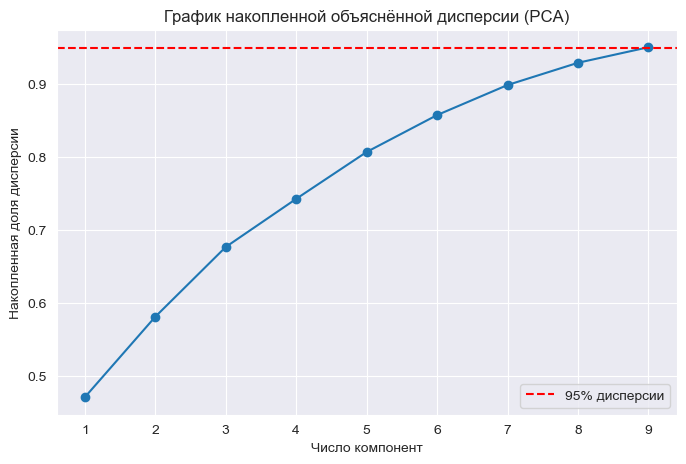

In [17]:
import matplotlib.pyplot as plt
import numpy as np

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% дисперсии')
plt.xlabel('Число компонент')
plt.ylabel('Накопленная доля дисперсии')
plt.title('График накопленной объяснённой дисперсии (PCA)')
plt.grid(True)
plt.legend()
plt.show()

In [18]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasRegressor

X = dataset[:, :-1]
y = dataset[:, -1]

scaler = StandardScaler()
X_norm = scaler.fit_transform(X)


pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_norm)

print("Исходное количество признаков:", X.shape[1])
print("После PCA:", X_pca.shape[1])

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

def create_model(meta, learning_rate=0.001, dropout_rate=0.0, neurons_layer1=64, neurons_layer2=32):
    n_features_in_ = meta["n_features_in_"]

    model = Sequential()
    model.add(Dense(neurons_layer1, input_shape=(n_features_in_,), activation='elu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neurons_layer2, activation='elu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16, activation='elu'))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae'])
    return model

model = KerasRegressor(
    model=create_model,
    learning_rate=0.001,
    dropout_rate=0.0,
    neurons_layer1=64,
    neurons_layer2=32,
    verbose=0,
    random_state=42
)

param_grid = {
    'model__learning_rate': [0.001, 0.01],
    'model__dropout_rate': [0.0, 0.2],
    'model__neurons_layer1': [32, 64],
    'model__neurons_layer2': [16, 32],
    'batch_size': [10, 32],
    'epochs': [50, 100]
}

grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    verbose=1
)

print("Запуск Grid Search...")
grid_result = grid.fit(X_train, y_train)

print("\n=== РЕЗУЛЬТАТЫ GRID SEARCH ===")
print(f"Лучший результат: {-grid_result.best_score_:.4f} MAE")
print("Лучшие параметры:")
for param, value in grid_result.best_params_.items():
    print(f"  {param}: {value}")

Исходное количество признаков: 13
После PCA: 9
Запуск Grid Search...
Fitting 3 folds for each of 64 candidates, totalling 192 fits


/opt/miniconda3/envs/ML/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-21 18:00:17.172642: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ig


=== РЕЗУЛЬТАТЫ GRID SEARCH ===
Лучший результат: 2.6538 MAE
Лучшие параметры:
  batch_size: 32
  epochs: 100
  model__dropout_rate: 0.2
  model__learning_rate: 0.01
  model__neurons_layer1: 32
  model__neurons_layer2: 32
